In [2]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [3]:
import pandas as pd


In [23]:
headers=["sepal_length","sepal_width","petal_length","petal_width","classes"]

In [24]:
dataset=pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Data-Science-Datasets/main/iris.csv", names=headers)

In [25]:
dataset


,sepal_length,sepal_width,petal_length,petal_width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
dataset.shape


(149, 5)

In [12]:
dataset.tail()


,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
dataset.head()


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [15]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [16]:
dataset.describe()


,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
!pip install seaborn

import seaborn as sns



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='classes', ylabel='count'>

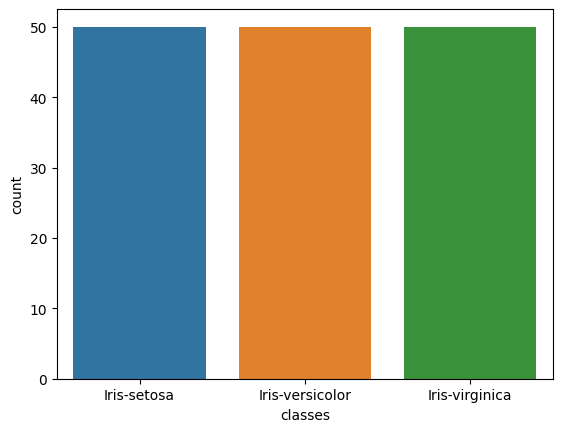

In [26]:
sns.countplot(x = 'classes', data=dataset, order = dataset['classes'].value_counts().index)

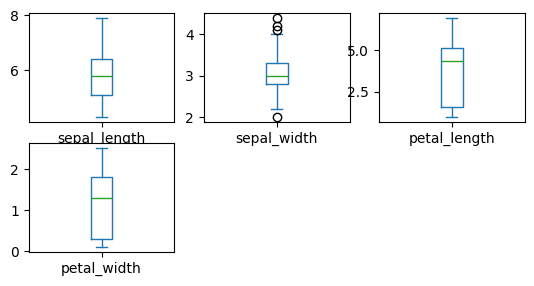

In [27]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

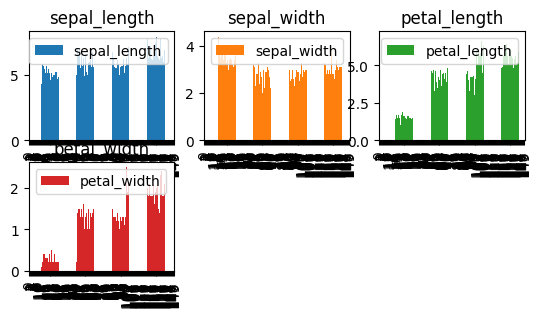

In [28]:
dataset.plot(kind='bar', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

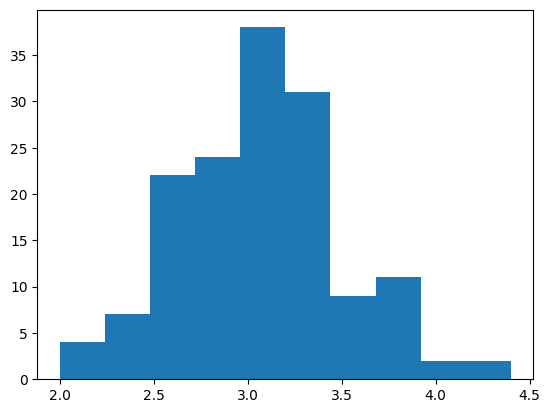

In [29]:
plt.hist(dataset['sepal_width'], bins=10)

plt.show()

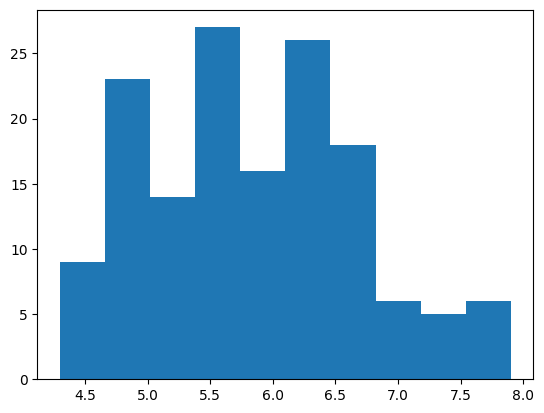

In [30]:
plt.hist(dataset['sepal_length'], bins=10)

plt.show()

C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

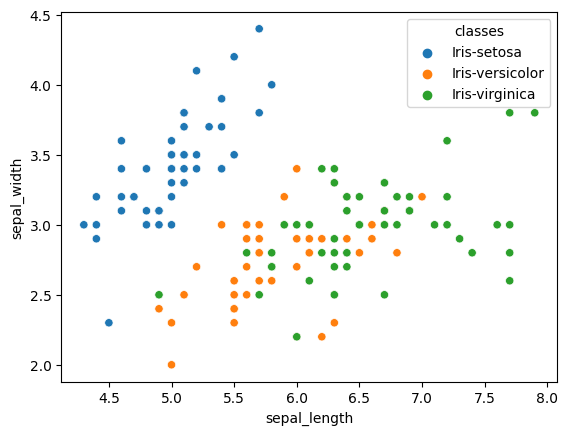

In [31]:
sns.scatterplot(data=dataset,x=dataset["sepal_length"], y=dataset["sepal_width"], hue=dataset["classes"])
plt.show()

C:\Users\pamir\AppData\Local\Temp\ipykernel_23416\1736922038.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='sepal_length',y='petal_length',ci=None)
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pamir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='sepal_length', ylabel='petal_length'>

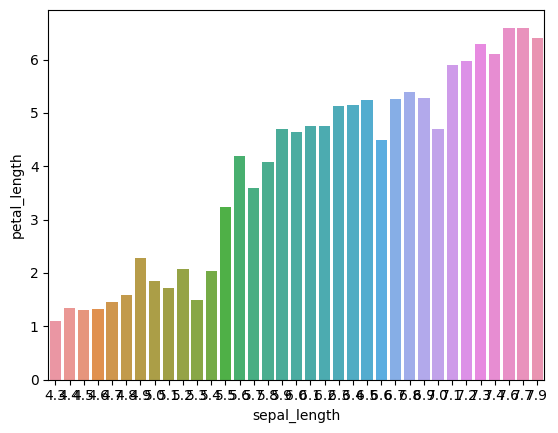

In [32]:
sns.barplot(data=dataset, x='sepal_length',y='petal_length',ci=None)

In [106]:
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

In [107]:
x


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [108]:
y


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [110]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (105, 4)
y_train:  (105,)
x_test:  (45, 4)
y_test:  (45,)


In [112]:
#Logic regression

In [113]:
model_lr = LogisticRegression(max_iter = 600)

In [114]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [115]:
y_pred_lr = model_lr.predict(x_test)

In [116]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.9777777777777777


In [118]:
#K Nearest Neighbors Classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
model_knn = KNeighborsClassifier()

In [121]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [122]:
y_pred_knn = model_knn.predict(x_test)

In [123]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.9777777777777777


In [124]:
#Naive Bayes Classifier¶

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
model_nb = GaussianNB()

In [127]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [128]:
y_pred_nb = model_nb.predict(x_test)

In [129]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.9333333333333333


In [130]:
#decision tree classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
model_dt = DecisionTreeClassifier()

In [133]:
model_dt = DecisionTreeClassifier()

In [134]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [135]:
y_pred_dt = model_dt.predict(x_test)

In [136]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.9555555555555556


In [138]:
Xnew = [[5.6,2.5,7.4,5.2]]
ynew = model_lr.predict(Xnew)
print(ynew)


['Iris-virginica']


In [139]:
Xnew = [[0.2,0.4,0.5,0.7]]
ynew = model_lr.predict(Xnew)
print(ynew)


['Iris-setosa']
